In [1]:
from ipywidgets import interact
import pandas as pd
import numpy as np
from tools import thinkstats as ts2
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('precision', 1)

In [3]:
column_list = ['caseid', 'prglngth', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb', 'birthwgt_oz', 
               'totalwgt_lb', 'agepreg', 'finalwgt']

def trim_df_to_columns(df, columns=column_list):
    return df[columns]

In [4]:
df_raw = ts2.read_fem_preg(clean=False)
df_cleaned = ts2.read_fem_preg(clean=True)
# df_raw_trimed = trim_df_to_columns(df_raw)
df = trim_df_to_columns(df_cleaned)

In [5]:
df

,caseid,prglngth,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,totalwgt_lb,agepreg,finalwgt
0,1,39,1,1,1.0,8.0,13.0,8.8,33.2,6448.3
1,1,39,1,2,2.0,7.0,14.0,7.9,39.2,6448.3
2,2,39,1,1,1.0,9.0,2.0,9.1,14.3,12999.5
3,2,39,1,2,2.0,7.0,0.0,7.0,17.8,12999.5
4,2,39,1,3,3.0,6.0,3.0,6.2,18.3,12999.5
...,...,...,...,...,...,...,...,...,...,...
13588,12571,39,1,1,1.0,6.0,3.0,6.2,17.9,6269.2
13589,12571,6,2,2,NaN,NaN,NaN,NaN,18.5,6269.2
13590,12571,5,2,3,NaN,NaN,NaN,NaN,19.8,6269.2
13591,12571,39,1,4,2.0,7.0,8.0,7.5,21.6,6269.2


In [6]:
df.agepreg.var()

33.810829059010835

In [7]:
df['totalwgt_kg'] = df.totalwgt_lb * 0.453592

/Users/meilfort/Code/pyt/.ENV/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.shape

(13593, 11)

In [9]:
len(df.caseid)

13593

In [10]:
len(df[df['pregordr']==1])

5033

In [11]:
len(df[df['prglngth']<=13])

3522

In [12]:
len(df[df['outcome'] == 2])

1862

In [13]:
df.birthwgt_lb.max() < 22

True

In [14]:
len(df[df['agepreg'] < 45])

13241

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120eade48>]],
      dtype=object)

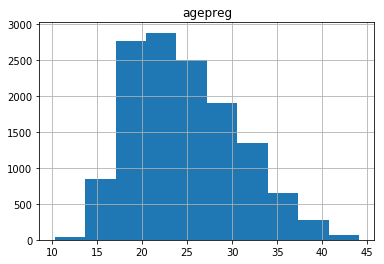

In [15]:
df.hist('agepreg')

In [16]:
from tools.distributions import Hist

In [17]:
live = df[df['birthord'] == 1]
other = df[df['birthord'] != 1]
other

,caseid,prglngth,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,totalwgt_lb,agepreg,finalwgt,totalwgt_kg
1,1,39,1,2,2.0,7.0,14.0,7.9,39.2,6448.3,3.6
3,2,39,1,2,2.0,7.0,0.0,7.0,17.8,12999.5,3.2
4,2,39,1,3,3.0,6.0,3.0,6.2,18.3,12999.5,2.8
6,6,40,1,2,2.0,9.0,9.0,9.6,28.8,8874.4,4.3
7,6,42,1,3,3.0,8.0,6.0,8.4,30.2,8874.4,3.8
...,...,...,...,...,...,...,...,...,...,...,...
13587,12570,9,2,3,NaN,NaN,NaN,NaN,23.4,11325.0,NaN
13589,12571,6,2,2,NaN,NaN,NaN,NaN,18.5,6269.2,NaN
13590,12571,5,2,3,NaN,NaN,NaN,NaN,19.8,6269.2,NaN
13591,12571,39,1,4,2.0,7.0,8.0,7.5,21.6,6269.2,3.4


In [25]:
live_hist = Hist(live.prglngth)
other_hist = Hist(other.prglngth)
mh = live_hist
mh.name

'prglngth'

In [19]:
cohens_d = live_hist.cohens_d(other_hist)
cohens_d

1.0930689583886173

In [20]:
print(f"Mean: {mh.mean}, Median: {mh.median}, Varianz: {mh.variance}, Std. Deviation: {mh.standard_deviation}, Mode: {mh.mode[0]}")

Mean: 38.60095173351461, Median: 39, Varianz: 7.79294720206645, Std. Deviation: 2.791585069824391, Mode: (39, 2114)


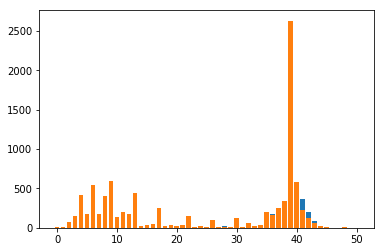

In [21]:
_ = live_hist.plot(), other_hist.plot() 

In [22]:
def choen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1, var2 = group1.var(), group2.var()
    n1,n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [23]:
d = choen_effect_size(live.prglngth, other.prglngth)
d


1.093008343362106

In [24]:
assert round(cohens_d,3) == round(d,3)